# 变量类型

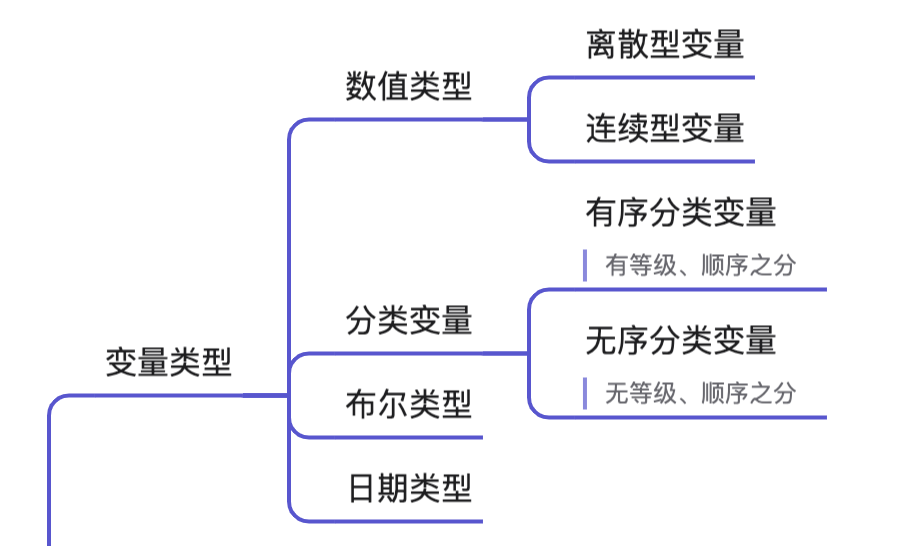
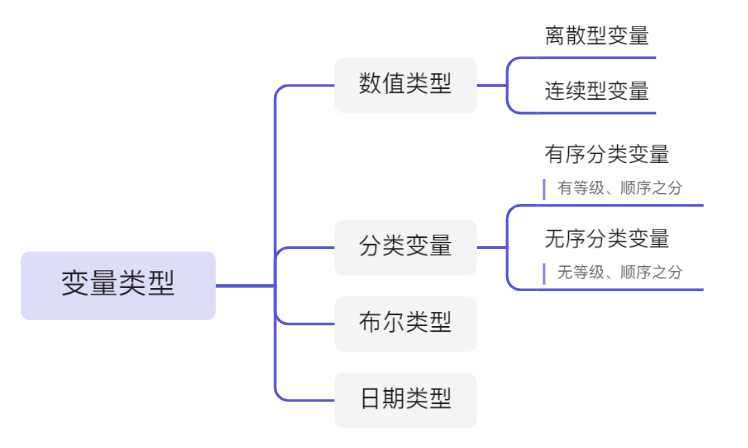

对于日期和时间型变量，一般在数据库常见的是datetime，存储格式为“YYYY-MM-DD HH：mm：ss”

其中YYYY表示年、MM表示月份、DD表示日期、HH表示小时、mm表示分钟、ss表示秒。

上述数据都是可以用表格形式存储的数据，即结构化数据

除此之外，还有非结构化数据，如文本、图像等。相比结构化数据而言，**非结构化数据更难让计算机理解，目前比较流行的做法是使用深度学习方法直接提取特征变量供模型使用**

# 常用分析方法

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.load_dataset() 会因网络问题报错，解决办法从github/[gitee](https://search.gitee.com/?skin=rec&type=repository&q=seaborn)上下载数据，手动导入seaborn-data目录中

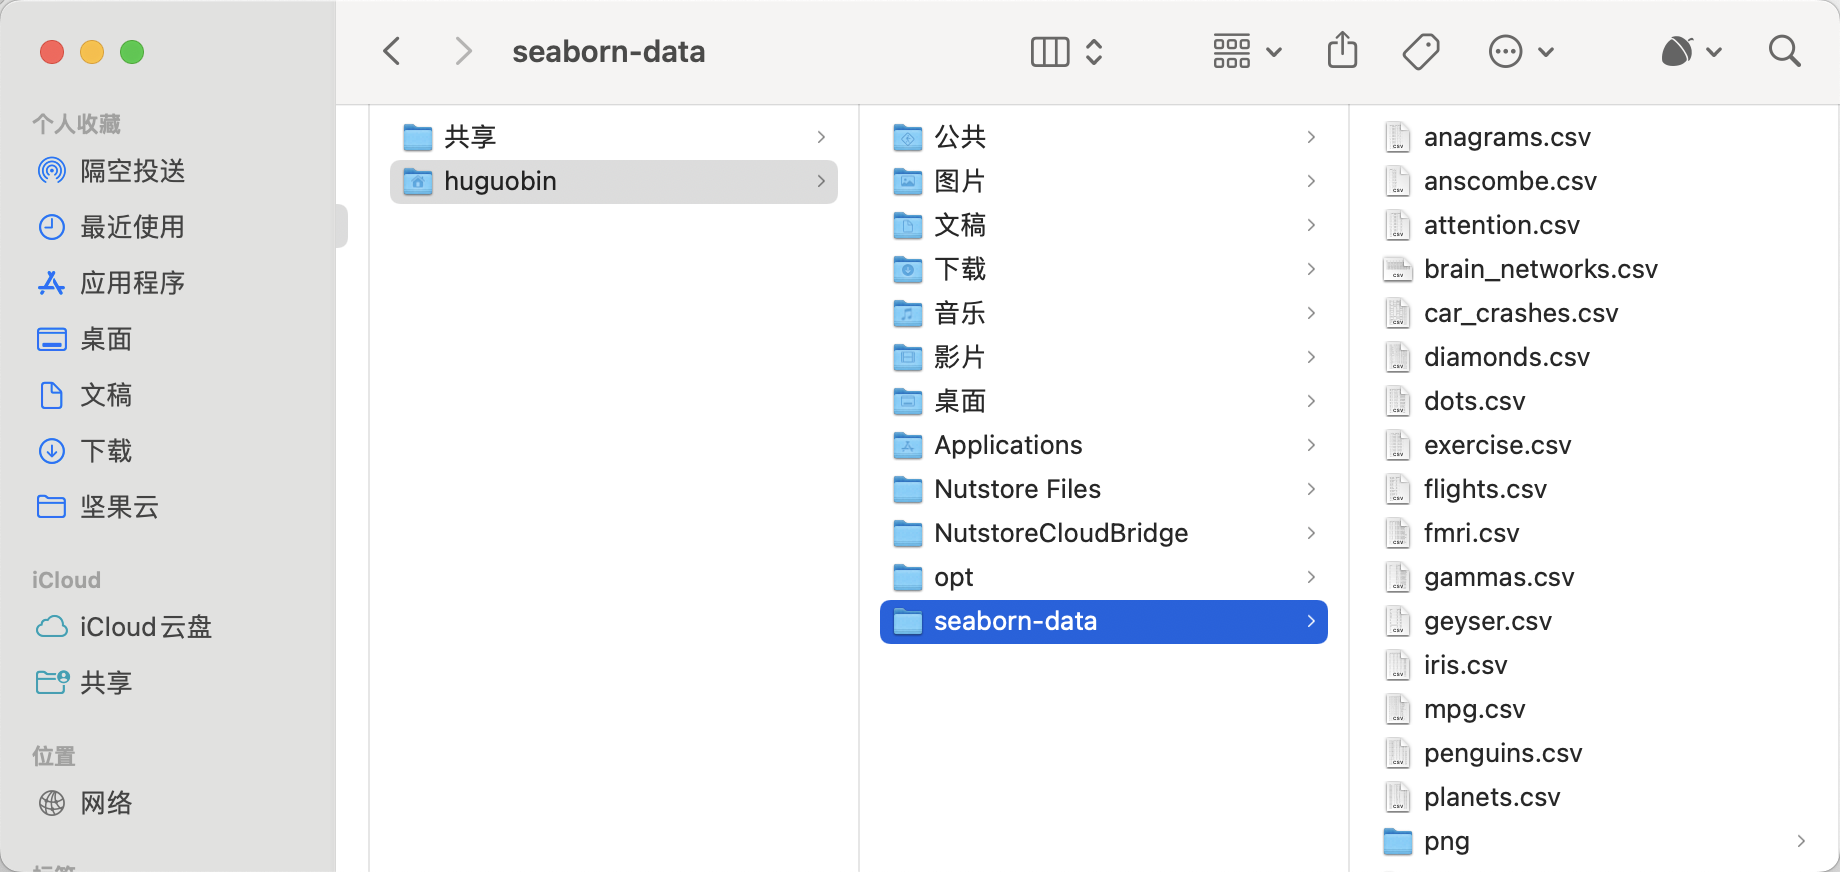

In [3]:
# seaborn 里也有数据集，可以直接加载使用
titanic_df = sns.load_dataset( 'titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 整体数据概览

### df.shape

查看数据形状

In [11]:
titanic_df.shape

(891, 15)

### df.info()

查看DataFrame的基本信息，包含索引、字段名称、非空值统计、字段类型

```PYTHON
df.info(
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
    null_counts: 'bool | None' = None,
) -> 'None'
```

In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### df.describe()

查看数值型变量的描述统计信息，包括数量、均值、标准差、最大最小值、分位数
```PYTHON
df.describe(
    percentiles=None,
    include=None,
    exclude=None,
    datetime_is_numeric=False,
) -> 'NDFrameT'
```

In [13]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 单变量可视化分析

单变量分析是通过数理统计和可视化的方法对变量分布情况和规律进行描述和刻画。

不同类型的变量需要使用不同的方法和指标

### 类别变量

类别变量的描述性统计指标主要有频数、占比、众数等

使用条形图和饼图就能直观展现

#### 条形图

条形图用宽度相同的条形的高度或长度来表示类别数据的多少

可以非常直观地展示类别之间的频数差别

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

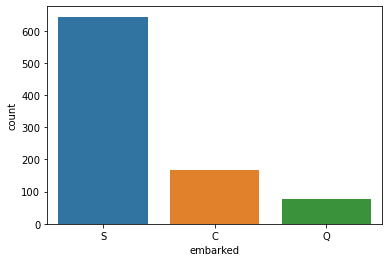

In [14]:
sns.countplot(titanic_df['embarked'])

#### 饼图

饼图展示的是占比指标

用于强调各项类别分别占总体的比例情况

<AxesSubplot:ylabel='embarked'>

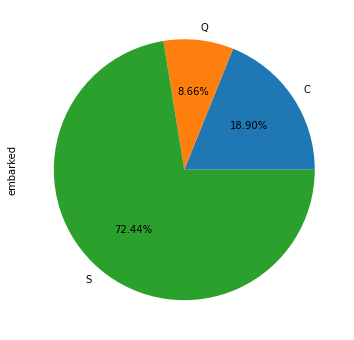

In [18]:
embarked_cnt=titanic_df.groupby('embarked')['embarked'].count()
embarked_cnt.plot.pie(autopct='%1.2f%%',figsize=(6,6))

### 数值变量

数值变量的描述性统计

指标主要有平均值、分位数、峰度、偏度、方差、标准差等

常以直方图、箱线图、小提琴图等进行可视化

#### 直方图

直方图的构建：第一步是将值的范围分段，然后计算每个间隔中有多少值

间隔必须相邻，并且通常（但非必须）是相等的大小

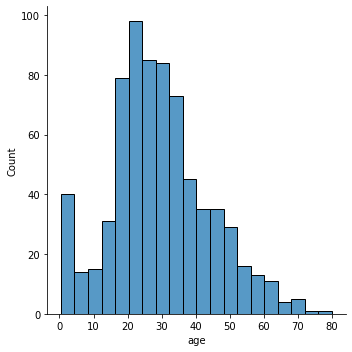

In [19]:
sns.displot(titanic_df[titanic_df.age.isnull().values==False]['age'],kde=False)

#### 箱形图

箱形图用于显示数据分散的情况

箱形图中间深色矩形部分的三条线分别对应上四分位数Q3、中位数和下四分位数Q1。远离中间深色矩形部分的两条线是上边缘和下边缘，一般上下边缘范围外的属于异常值

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

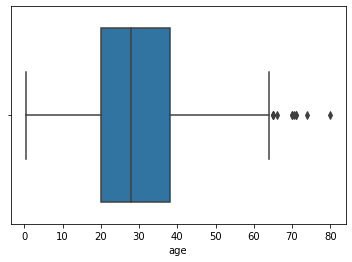

In [20]:
sns.boxplot(titanic_df['age'])

#### 小提琴图

小提琴图的功能与箱形图类似，它展示了数据分布及其概率密度，从而可以直观进行比较

与箱形图不同的是，小提琴图的所有绘图单元都与实际数据点对应，中间的黑色粗条表示四分位数范围，而白点表示中位数，从其延伸的黑线代表95%置信区间

箱形图隐藏了有关数据分布的重要细节，例如，我们不能了解数据分布是双模还是多模。小提琴图可以显示更多详情，但也可能包含较多干扰信息，例如小样本的小提琴图可能看起来非常平滑，这种平滑具有误导性，实践中绘制小提琴图时需要留意样本呈的大小

<AxesSubplot:ylabel='age'>

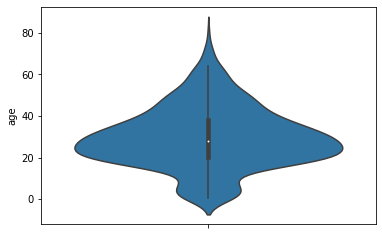

In [21]:
sns.violinplot(y=titanic_df['age'])

## 双变量可视化分析

双变量分析同时分析两个变量，以探讨两个变量之间的关系：是否存在关联或差异，以及这种关联或差异的强度

### 数值双变量

双变量数值之间常用散点图和相关性图进行可视化分析

#### 散点图

散点图是显示两个数值变量之间关系的一种可视化，用两组数据构成多个坐标点，考察坐标点的分布，判断两个变量之间是否存在某种关联，或总结坐标点的分布模式

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pclass', ylabel='age'>

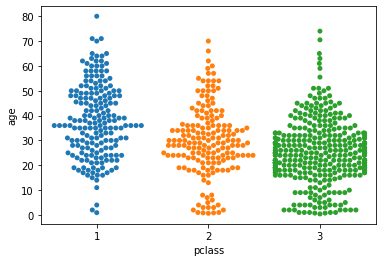

In [23]:
#查看年龄与舱位的等级散点图
sns.swarmplot(y='age',x='pclass',data=titanic_df)

通过散点图可以直观地发现，买头等舱（pclass=1）的人年龄相对大一些，普通舱（pclass=2）则以青年为主

#### 相关性图

相关性图可反映两个变量之间的相关方向，但无法确切表明两个变量之间相关的程度，因此在绘图的时候还需要增加相关系数，以便让人更直观地判断相关程度

由于研究对象的不同，相关系数有多种定义方式，数值变量较为常用的是皮尔逊相关系数

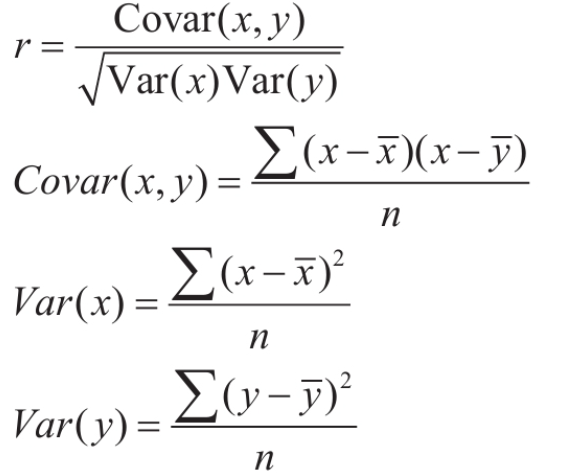

r是线性相关系数，Covar是协方差，Var是方差

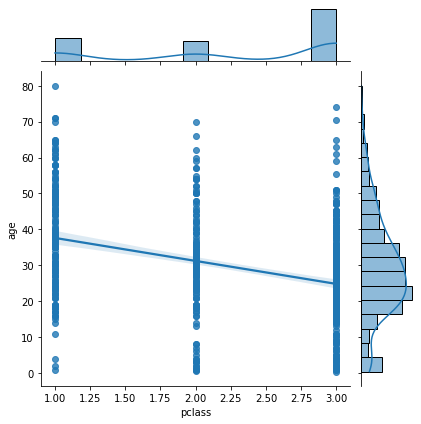

In [35]:
from scipy.stats import pearsonr
#查看年龄和舱位等级相关性
# sns.jointplot(x='pclass',y='age',data=titanic_df,kind='reg',stat_func=pearsonr) 原代码报错
sns.jointplot(x='pclass',y='age',data=titanic_df,kind='reg')

age和pclases呈现低的负线性相关。需要指出的是，线性相关系数只能表示线性相关，无法表示非线性相关

### 类别双变量

双变量类别之间常用堆积图和卡方检验进行分析

#### 堆积柱形图

堆积柱形图可以直观展示某个类别下另一个类别变量的数量情况

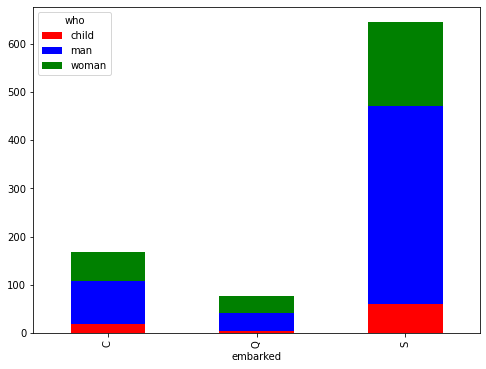

In [37]:
var=titanic_df.groupby(['embarked','who']).who.count()
var.unstack().plot(kind='bar',stacked=True,color=['red','blue','green'],figsize=(8,6))
plt.show()

#### 卡方检验

卡方检验可用于确定分类变量之间的相关性，它基于频率表中一个或多个类别中的预期频率（e）和观察到的频率（n）之间的差异。卡方分布返回计算出的卡方和自由度的概率，概率为零表示两个类别变量之间完全依赖，而概率为1表示两个类别变量完全独立

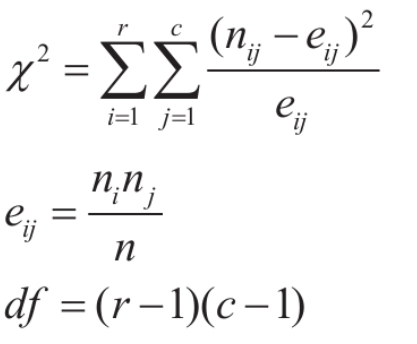

In [39]:
from scipy.stats import chi2_contingency
#计算embarked和alive交叉列联表
embarked_alive=pd.crosstab(titanic_df.embarked,titanic_df.alive)
chi2,p,dof,ex=chi2_contingency(embarked_alive)
print('卡方值：{}'.format(chi2))
print('p_value：{}'.format(p))
print('自由度：{}'.format(dof))
print('期望频率：{}'.format(ex))

卡方值：26.48914983923762
p_value：1.769922284120912e-06
自由度：2
期望频率：[[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


### 数值变量与类别变量

数值变量和类别变量分析常用含误差条的线图、组合图、Z检验和t检验

#### 含误差条的线图

含误差条的线图中，横坐标表示类别变量，纵坐标表示具体类别下连续变量的分布情况，其中误差条表示标准误差，这是一种展示两个变量如何相互关联和变化的方法

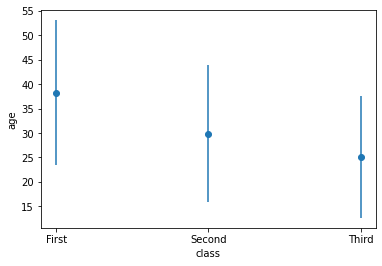

In [43]:
plt.errorbar(
    x=titanic_df.groupby(['class']).age.mean().index,
    y=titanic_df.groupby(['class']).age.mean(),
    yerr=titanic_df.groupby(['class']).age.std(),
    fmt="o"
)
plt.xlabel('class')
plt.ylabel('age')
plt.show()#图不对

#### 组合图

组合图同时使用两种或多种图表类型

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


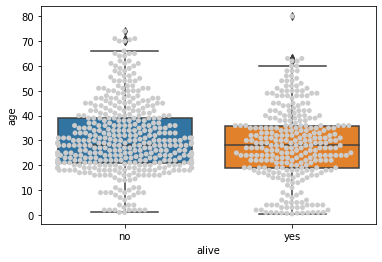

In [44]:
ax=sns.boxplot(x='alive',y='age',data=titanic_df)
ax=sns.swarmplot(x='alive',y='age',data=titanic_df,color='.8')

#### Z检验和t检验

评估两组数据的均值是否有显著差异，可以使用Z检验和t检验

Z检验是用标准正态分布的理论来推断差异发生的概率，从而比较两组数据的均值的差异是否显著。已知标准差，要验证一组数的均值是否与某一期望值相等时，使用Z检验

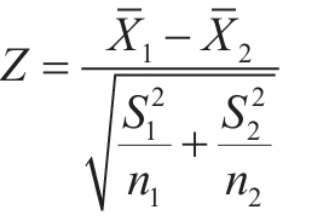

t检验是用t分布理论来推断差异发生的概率，从而判定两组数据的均值的差异是否显著。t检验，亦称Student t检验（Student’s t test），主要用于总体标准差σ未知的正态分布

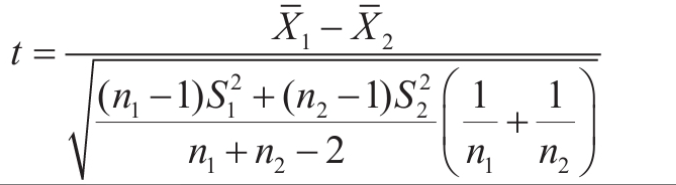

In [45]:
# 使用SciPy的t检验接口检测经典泰坦尼克数据集titanic男女的年龄均值是否有显著差异
from scipy.stats import ttest_ind

titanic_age=titanic_df[titanic_df.age.isnull().values==False]

t_statistics,p=ttest_ind(
    titanic_age[titanic_age['sex']=='female'].age,
    titanic_age[titanic_age['sex']=='male'].age
)

print('t值：{}'.format(t_statistics))
print('p_value：{}'.format(p))

t值：-2.499206354920835
p_value：0.012671296797013709


由t检验结果可知p_value小于0.05，在显著水平α=0.05的水准下，titanic男女的年龄均值是有显著差异的

## 多变量可视化分析

多变量分析是复杂的，但人接收和理解信息的能力是有限的

多变量数据的可视化可以使用二维图像的多维表达、多个二维图像的分类、降维可视化展示

多维数据可视化比较少用到Seaborn，而更多地使用Pandas、Matplotlib。

由于部分接口不能传入空值数据，为了方便演示，下面的案例会创建一个新的Dataframe，并对空值字段进行均值或众数填充

In [47]:
titanic=sns.load_dataset('titanic')
# 对缺失值填充
titanic['age'].fillna(titanic['age'].median(),inplace=True)

### 多图网络

Seaborn提供了非常方便快速查看多变量分布的接口——多图网格seaborn.FacetGrid和seaborn.PairGrid。

seaborn.JointGrid也属于多图网格，不过JointGrid主要用于分析单变量和双变量

#### FacetGrid

FacetGrid可以展示在数据集的子集内可视化变量的分布或多个变量之间的关系，FacetGrid可绘制最多3个维度：Row、Col和Hue。Row和Col将数据集映射到由行和列组成的网格中的多个轴上，这些轴与数据集中的变量对应。Hue参数表示第3个变量的级别，该参数以不同的颜色绘制数据的不同子集，这使用颜色来解析第三维上的元素

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


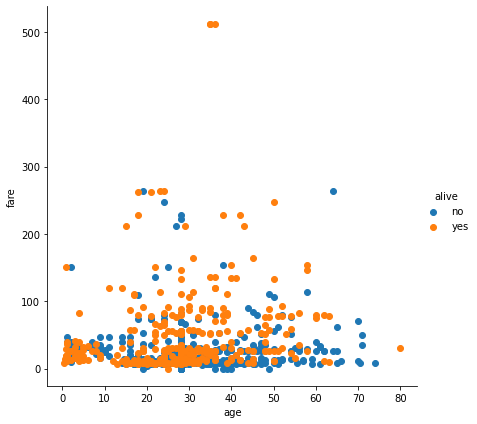

In [49]:
sns.FacetGrid(titanic,hue='alive',size=6).map(plt.scatter,'age','fare').add_legend()

#### PairGrid

seaborn.PairGrid支持快速绘制变量间两两关系的多个子图。在PairGrid中，每行每列都被分配给一个不同的变量，所以最后生成的图片可以展示数据集中所有的成对关系。在PairGrid中，每张子图都代表了不同的两个变量间的关系，PairGrid可以对数据集中的变量关系提供非常快速、整体（但不深入）的总结。

PairGrid表现的维度理论上无上限，PairGrid还有一定的灵活性，可以设置对角类型、非对角类型、具体的列、对角上下的图表格式等，具体可查看Seaborn官方文档

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


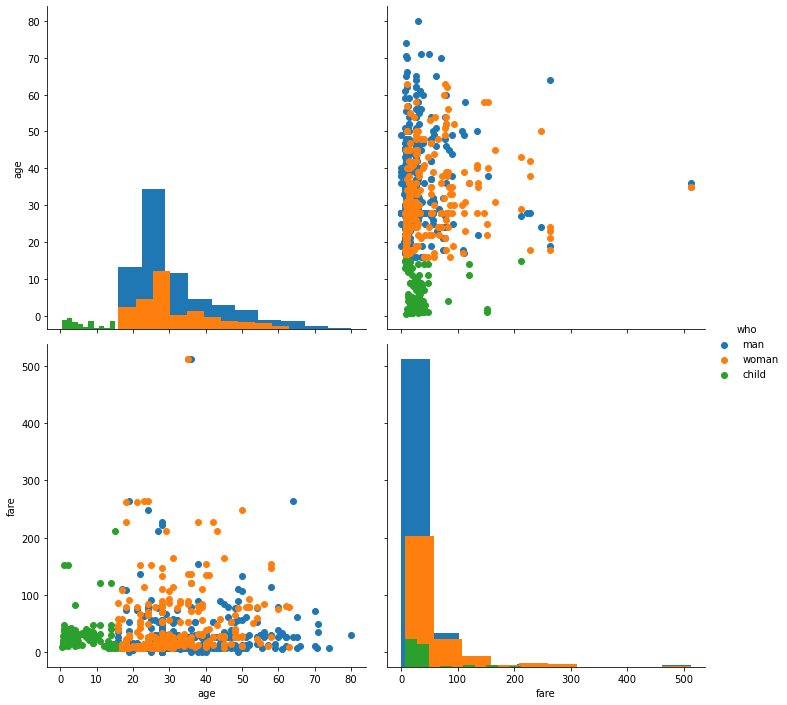

In [51]:
# 为了展示效果，行列只选了两个字段
g=sns.PairGrid(titanic[['age','fare','who']],hue='who',size=5)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

### 热力图

热力图通过色差、亮度来展示数据相关性

<AxesSubplot:>

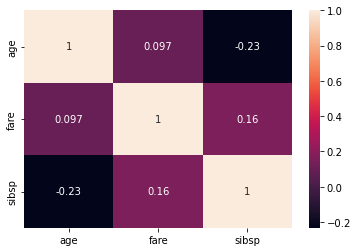

In [52]:
f=titanic[['age','fare','sibsp']].corr()
sns.heatmap(f,annot=True)

上图中数值是皮尔森相关系数，浅颜色表示相关性高

# 缺失值分析与处理

先要了解数据缺失是由什么原因导致的，数据缺失的情况如何，才能更合理地处理缺失数据

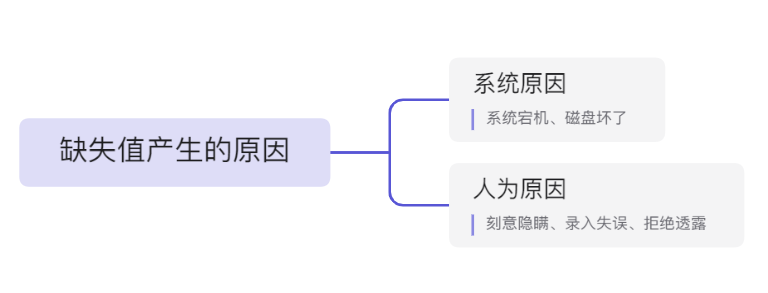

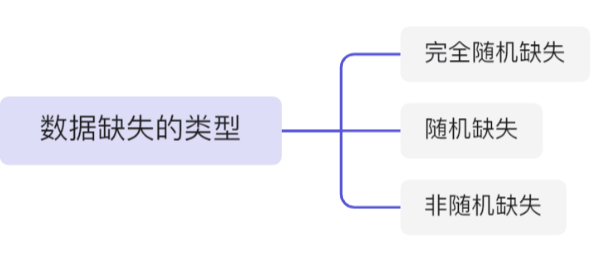

数据缺乏主要分为以下3类。

完全随机缺失（Missing Completely At Random，MCAR）指的是数据的缺失是完全随机的，不依赖于任何不完全变量或完全变量，不影响样本的无偏性，如家庭地址缺失。

随机缺失（Missing At Random，MAR）指的是数据的缺失不是完全随机的，即该类数据的缺失依赖于其他完全变量，如财务数据缺失情况与企业的大小有关。

非随机缺失（Missing Not At Random，MNAR）指的是数据的缺失与不完全变量自身的取值有关，如高收入人群不愿意提供家庭收入数据。

对于随机缺失和非随机缺失，直接删除记录是不合适的。对于随机缺失可以通过已知变量对缺失值进行估计并填充，而对于非随机缺失还没有很好的解决办法。

## 查看缺失值

查看数据缺失的情况主要结合Pandas（统计）和Missingno（可视化）来介绍

### Pandas统计缺失情况

Pandas对象的所有描述性统计默认都不包括缺失数据

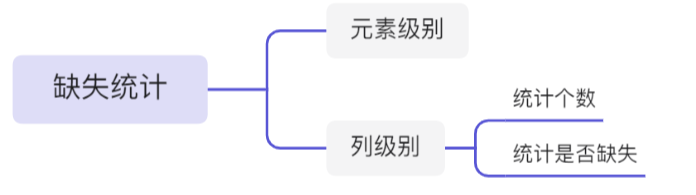

元素级别缺失统计

In [54]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


列级别是否缺失统计

In [55]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

列级别缺失个数统计

In [56]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Missingno缺失值可视化

Missingno提供了一个灵活且易于使用的缺失值数据可视化的Python库，可以快速直观地查看数据集完整性（或缺失性）的整体情况

<AxesSubplot:>

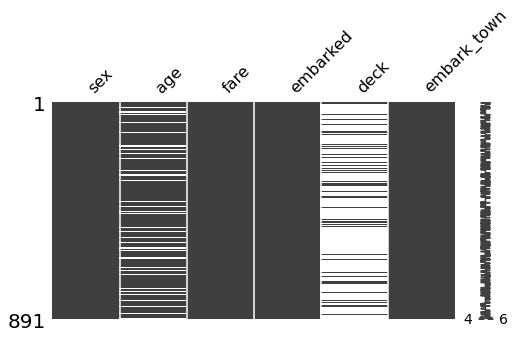

In [61]:
import missingno as msno
#为了展示效果，只选取部分字段，调整了图片和字段大小
msno.matrix(
    df=titanic_df[['sex','age','fare','embarked','deck','embark_town']],
    figsize=(8,4),
    fontsize=16
)

missingno.heatmap查看缺失变量之间的相关性，它将输入的Dataframe通过dataframe.isnull（）生成新的缺失值的Dataframe，然后计算变量缺失值的相关性。热力图可以很直观快速地观察哪些变量经常一起缺失，方便数据核验

<AxesSubplot:>

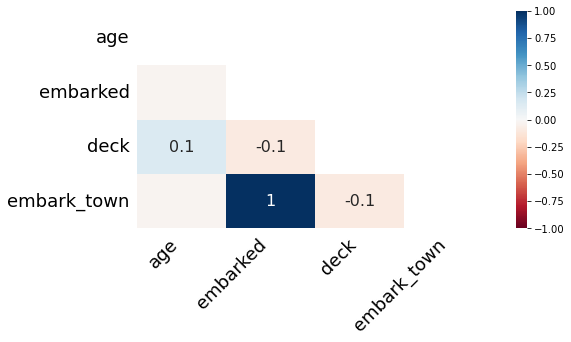

In [63]:
msno.heatmap(df=titanic_df,figsize=(8,4),fontsize=18)

missingno.bar利用条形图可以更直观地看出每个变量缺失的比例和数量情况，接口展示的是每个变量非空值的数量和比例。

<AxesSubplot:>

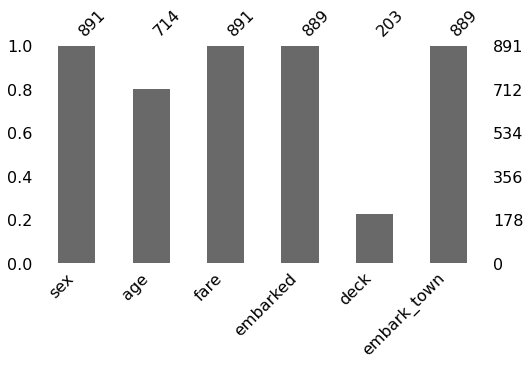

In [64]:
msno.bar(
    df=titanic_df[['sex','age','fare','embarked','deck','embark_town']],
    figsize=(8,4),
    fontsize=16
)

## 处理缺失值

对于主观数据，人将影响数据的真实性，存在缺失值的样本的其他属性值无法保证可靠性，那么依赖于这些属性值的填充也是不可靠的，所以对于主观数据一般不推荐插补的方法

插补主要是针对客观数据

在实际工作中除非数据特征和样本足够多，一般不会只要有缺失值就一定将样本删除，需要计算缺失值的比例以及该变量的区分能力。如果变量的缺失值比例高但是有一定区分能力，则需要结合实际情况考虑保留还是删除

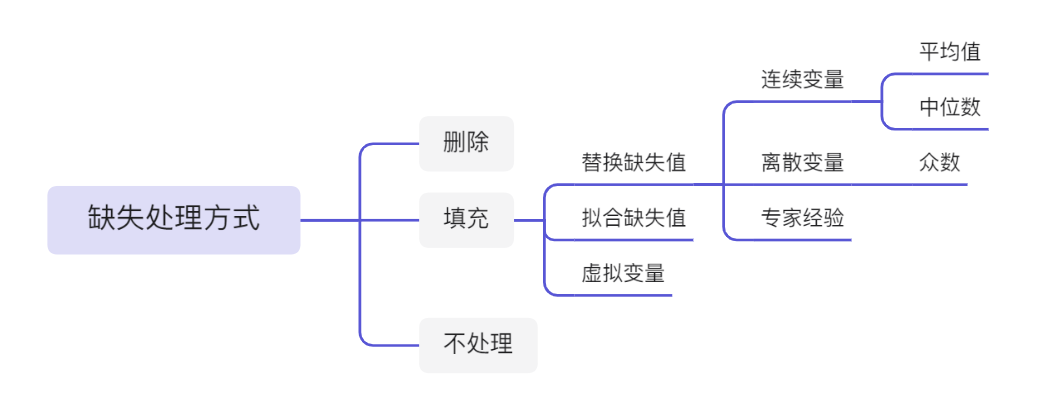

### 删除

In [65]:
titanic.shape

(891, 15)

In [66]:
titanic_row=titanic.dropna(axis=0)
titanic_row.shape

(201, 15)

In [71]:
def drop_nan_stat(df,copy=False,axis=0,nan_threshold=0.9):
    '''按行、列的缺失值比例删除 > 阈值的行、列
    '''
    assert isinstance(df,pd.DataFrame)
    return_df=df.copy() if copy else df
    n_rows,n_cols=return_df.shape
    
    if axis==0:
        t=return_df.isnull().sum(axis=0)
        t=pd.DataFrame(t,columns=['NumOfNan'])
        t['PctOFNan']=t['NumOfNan']/n_rows
        return_df=return_df.drop(
            labels=t[t.PctOFNan > nan_threshold].index.tolist(),
            axis=1
        )
    elif axis==1:
        t=return_df.isnull().sum(axis=1)
        t=pd.DataFrame(t,columns=['NumOfNan'])
        t['PactOFNan']=t['NumOfNan']/n_cols
        print(t)
        return_df=return_df.drop(
            labels=t[t.PctOFNan > nan_threshold].index.tolist(),
            axis=1
        )
    return return_df

删除缺失值比例大于0.5的列

<AxesSubplot:>

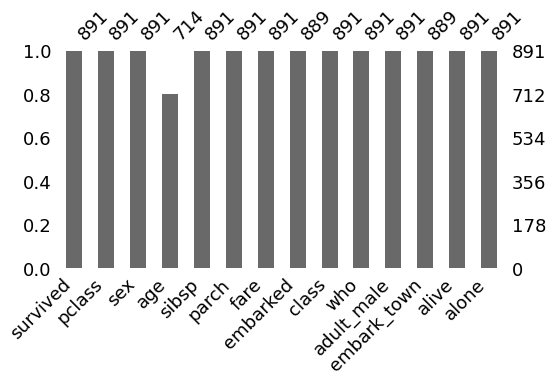

In [72]:
titanic_df_col=drop_nan_stat(
    df=titanic_df,
    copy=True,
    axis=0,
    nan_threshold=0.5
)
msno.bar(df=titanic_df_col,figsize=(8,4),fontsize=18)

### 填充

对缺失值的填充大体可分为3种：替换缺失值、拟合缺失值、虚拟变量。

替换是通过数据中非缺失数据的统计指标或业务经验值填充

拟合是通过其他特征建模来填充

虚拟变量是用衍生的新变量代替缺失值

#### 替换缺失值

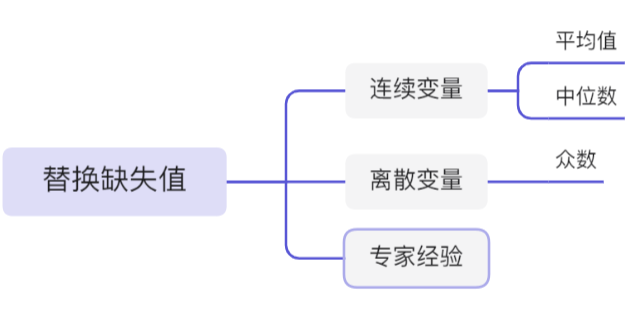

In [73]:
titanic_df_fill=titanic_df.copy()
titanic_df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [74]:
titanic_df_fill['age'].fillna(titanic_df_fill['age'].median(),inplace=True)
titanic_df_fill['age'].isnull().any()

False

In [75]:
titanic_df_fill['embarked'].fillna(titanic_df_fill['embarked'].mode()[0],inplace=True)

#### 拟合缺失值

通过构建模型的方式对缺失值进行填充，连续变量的拟合使用回归模型，分类变量的拟合使用分类模型

建模方法为：将原始数据按待填充的列分为两个数据集，一个数据集中该列未缺失，一个数据集中该列缺失。通过在未缺失数据集上建模，预测并填充缺失数据集中的列值。注意，待填充的列作为模型中的y值，实现建模和预测填充

In [77]:
# 以随机森林为例
from sklearn.ensemble import RandomForestRegressor

age_df=titanic_df[['age','fare','parch','sibsp','pclass']].copy()
print(age_df['age'].isnull().any())

True


In [79]:
#按年龄是否缺失，可分为训练数据集和预测数据集
train_df=age_df[age_df.age.notnull()].values
predict_df=age_df[age_df.age.isnull()].values
y=train_df[:,0]
X=train_df[:,1:]

#训练数据集使用RandomForestRegressor训练模型
rf_model=RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(X,y)
#用训练好的模型预测数据集的年龄进行预测
predict_ages=rf_model.predict(predict_df[:,1:])
#预测结果填补原缺失数据
age_df.loc[(age_df.age.isnull()),'age']=predict_ages
print(age_df['age'].isnull().any())

False


#### 虚拟变量

虚拟变量是指通过判断变量值是否有缺失值来生成一个新的二分类变量。比如，列A中特征值缺失，那么生成的列B中的值为True；否则，列B中的值为False

In [80]:
age_df['age']=titanic['age'].copy()

#判断年龄是否缺失，衍生一个新变量age_nan
age_df.loc[(age_df.age.notnull(),'age_nan')]="False"
age_df.loc[(age_df.age.isnull(),'age_nan')]="True"

#统计新变量age_nan缺失和非缺失的数量，可以与之前的缺失值可视化进行缺失值数据核验
age_df['age_nan'].value_counts()

False    891
Name: age_nan, dtype: int64

### 不处理

如果缺失包含了业务含义，那么完全有理由保留该变量，实际处理中可直接将缺失值填充为区别于正常值的默认值，比如-1，也可以用分箱方法，将缺失值单独分为一箱

不同模型对缺失的要求不同，SVM和KNN，其模型原理中涉及了对样本距离的度量，如果缺失值处理不当，最终会导致模型预测效果很差；XGBoost、LightGBM等模型本身就可以应对具有缺失值的数据

# 异常值分析与处理

异常值（Outlier）是指那些在数据中明显与其他数值偏离的少量数值，可以通过统计检测（如三西格玛检测）和可视化（如箱型图）发现

日常的数据分析中经常会遇到异常值，要慎重处理


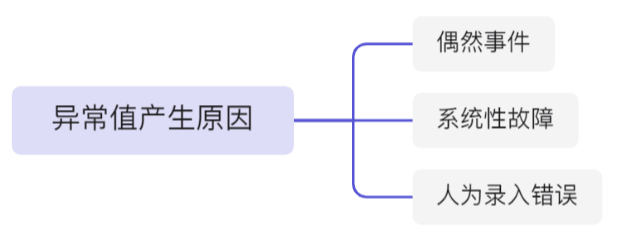

## 查看异常

检测方法找到的异常值并不是绝对准确的，具体情况还需根据业务的理解加以判断

### 异常值检测

#### pd.describe

异常值统计检测方法可直接使用pandas.describe进行大致浏览

#### 三西格玛检测

数据服从正态分布时可使用三西格玛检测异常值

99%的数值应该位于均值3个标准差之内，即P（|x-μ|＞3σ）≤0.003，如果数值超出这个范围，可以认为它是异常值

在判断异常值之前需要计算z分数（Z-score），它也叫标准分数（StandardScore）

标准分数是一个观测或数据点的值高于被观测值或测量值的平均值的标准偏差的符号数，在平均数之上的分数会得到一个正的标准分数，在平均数之下的分数会得到一个负的标准分数，通过标准分数可以看出数据点在分布中的相对位置

In [83]:
#只选取上述泰坦尼克数据集的3个字段作为案例展示
columns=['pclass' , 'age' , 'fare']
for var in columns:
    titanic_df[var+'_zscore']=(titanic_df[var]-titanic_df[var].mean())/titanic_df[var].std()
    z_normal=abs(titanic_df[var+'_zscore'])>3
    print(var+'中有'+str(z_normal.sum())+'个异常值')

pclass中有0个异常值
age中有2个异常值
fare中有20个异常值


#### 箱线图

箱线图中，上下界之外的值可视为异常值。

IQR（差值）=U（上四分位数）-L（下四分位数），上界=U+1.5IQR，下界=L-1.5IQR。这也是Tukey异常值检测方法

In [85]:
for var in columns:
    iqr=titanic_df[var].quantile(0.75)-titanic_df[var].quantile(0.25)
    q_abnormal_L=titanic_df[var]<titanic_df[var].quantile(0.25)-1.5*iqr
    q_abnormal_U=titanic_df[var]>titanic_df[var].quantile(0.75)+1.5*iqr
    print(var+'中有'+str(q_abnormal_L.sum()+q_abnormal_U.sum())+'个异常值')

pclass中有0个异常值
age中有11个异常值
fare中有116个异常值


### 异常点检测

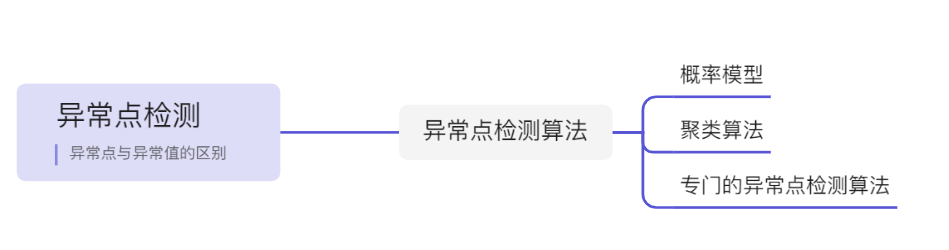

异常点检测与异常值检测主要的区别在于：异常值针对单一变量，而异常点则是针对多变量

异常点检测（又称离群点检测）是通过多种检测方法找出数据集中与大多数数据有明显差异的数据点，这些数据点被称为异常点或者离群点

常见的异常点检测算法有基于统计的概率模型、聚类算法、专门的异常点检测算法等

以聚类算法为例介绍异常点的检测

异常点检测和聚类分析是两项高度相似的任务，但目的不同。聚类分析发现数据集中的模式，而异常点检测则试图捕捉那些显著偏离多数模式的异常情况。基于聚类的异常点检测是用聚类方式将数据划分为不同的簇，计算簇内每个点与簇中心的相对距离（相对距离等于点到簇中心的距离除以这个簇所有点到簇中心距离的中位数），相对距离较大的点被视为异常点。注意，距离度量使用的是所有点到簇中心距离的中位数，而不是平均值，因为异常值对中位数的影响很小，但是对均值的影响较大

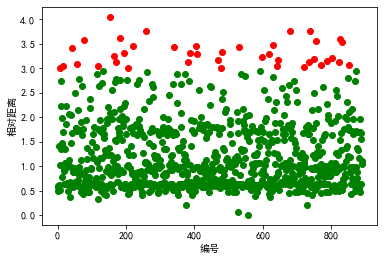

In [87]:
from sklearn.cluster import KMeans
#修改Matplotlib配置参数支持中文显示
plt.rcParams['font.family']='SimHei'
#聚类的类别
k=3
#异常点阈值
threshold=3
#读取已经填充过空值的数据
data=titanic[['pclass','age','fare']].copy()
#数据标准化
data_zs=1.0*(data-data.mean())/data.std()
#使用聚类模型聚类
model=KMeans(n_clusters=3,max_iter=500)
model.fit(data_zs)
#标准化数据及其类别
r=pd.concat([data_zs,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+['聚类类别']

#计算相对距离
norm=[]
for i in range(k):
    norm_tmp=r[['pclass','age','fare']][r['聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp=norm_tmp.apply(np.linalg.norm,axis=1)
    norm.append(norm_tmp/norm_tmp.median())

norm=pd.concat(norm)
#正常点,相对距离小于或等于异常点阈值
norm[norm <= threshold].plot(style = 'go')
# 异常点，相对距离大于异常点阈值
discrete_points = norm[norm >threshold]
discrete_points.plot(style = 'ro')
plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()

In [88]:
discrete_points=norm[norm>threshold]
discrete_points.index

Int64Index([851, 258, 679, 737,   7,  16,  43,  58,  78, 119, 152, 164, 172,
            183, 193, 205, 222, 340, 381, 386, 406, 407, 469, 479, 482, 530,
            597, 618, 631, 642, 644, 720, 736, 750, 755, 771, 788, 803, 824,
            827, 831],
           dtype='int64')

## 异常值的处理

上述检测方法找到的异常值并不是绝对准确的，具体情况还需根据业务的理解加以判断

异常值进行处理也需结合实际情况

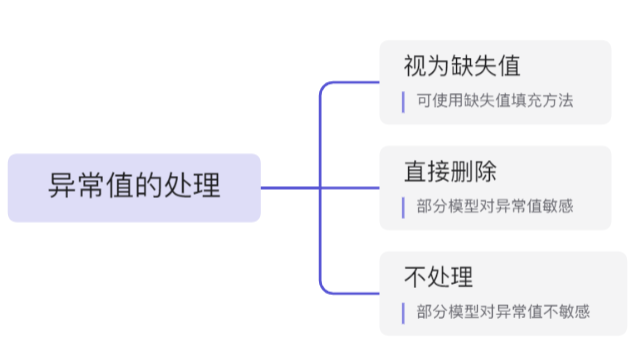

# 数据分析开发包

数据分析有套路，可写工作便开发
